In [1]:
%matplotlib inline
import pandas as pd
import sqlite3

In [47]:
c = sqlite3.connect('weather_cost.db')
sql = '''
select * from data limit 1
'''
df = pd.read_sql(sql, c)
c.close()
print(df.columns)
df

Index(['ORG', 'OBJECT', 'PROJECT', 'ACCOUNT', 'DESCRIPTION', 'YEAR', 'PER',
       'JOURNAL', 'EFF DATE', 'SRC', 'T', 'REF1', 'PO/REF2', 'REF3',
       'REFERENCE', 'AMOUNT', 'YR', 'MT', 'DY', 'TEMP MAX', 'TEMP MIN',
       'TEMP AVG', 'TEMP DEP', 'TEMP HDD', 'TEMP CDD', 'PCPN WTR', 'SNOW SNW',
       'SNOW DPTH', 'WIND AVG SPD', 'WIND MX SPD', 'WIND 2MIN DIR',
       'SUNSHINE MIN', 'SUNSHINE PSBL', 'SKY S-S', 'SKY WX', 'PK SPD',
       'PK DR'],
      dtype='object')


,ORG,OBJECT,PROJECT,ACCOUNT,DESCRIPTION,YEAR,PER,JOURNAL,EFF DATE,SRC,...,SNOW DPTH,WIND AVG SPD,WIND MX SPD,WIND 2MIN DIR,SUNSHINE MIN,SUNSHINE PSBL,SKY S-S,SKY WX,PK SPD,PK DR
0,44330,57141,0,1100-40-44-443-4430-0000-00000-00000-57141-00000,ST SN PLOW ID CHRG FS,2015,12,3750.0,2015/12/30,GEN,...,3,3.7,8,300,M,M,10,18.0,13,270


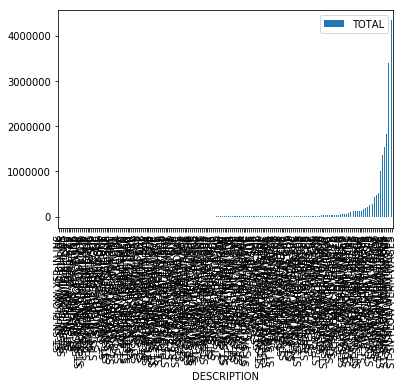

In [48]:
c = sqlite3.connect('weather_cost.db')
sql = '''
select DESCRIPTION, SUM(AMOUNT) as TOTAL from data 
group by DESCRIPTION
order by TOTAL
'''
df = pd.read_sql(sql, c)
c.close()
df.plot.bar(x = "DESCRIPTION")

,DESCRIPTION,TOTAL
149,ST SN CROS HLTH INS B,56521.10
150,ST SN REMV PERM WAGES,64164.26
151,ST SN PLOW PRMIUM PAY,64678.63
152,ST SN PLOW COMP ABSNC,75988.82
153,SW ADM XFR ID CHG INS,110260.00
154,SW ADM WI RET SY,118717.80
155,ST SN REMV ID CHRG FS,120014.08
156,ST SN BARR PERM WAGES,123488.90
157,ST SN PLOW COMP ESCRW,123557.27
158,ST SN PLOW WRK SUP,127650.07


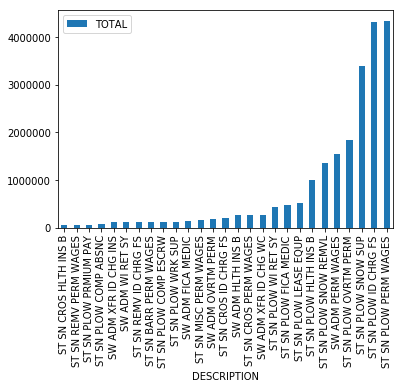

In [123]:
c = sqlite3.connect('weather_cost.db')
sql = '''
select DESCRIPTION, SUM(AMOUNT) as TOTAL from data 
group by DESCRIPTION
order by TOTAL
'''
df = pd.read_sql(sql, c)
df = df[df["TOTAL"] >= 50000]
c.close()
df.plot.bar(x = "DESCRIPTION")
df

In [85]:
c = sqlite3.connect('weather.db')
sql = '''
select distinct MT from weather
'''
df = pd.read_sql(sql, c)
c.close()
temp = list(df.T.to_dict().values())
months = []
for item in temp:
    months.append(item['MT'])

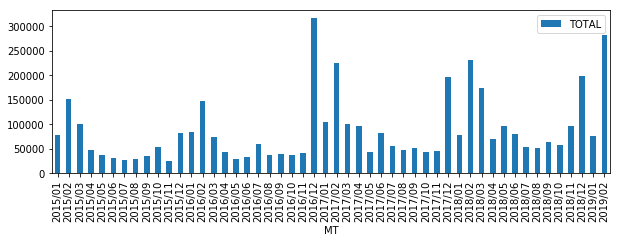

In [107]:
def group_amount(description, group = 'MT'):
    c = sqlite3.connect('cost.db')
    sql = '''
    select "''' + group + '''", SUM(AMOUNT) as TOTAL from cost
    where DESCRIPTION = "''' + description + '''"
    group by "''' + group + '''"
    order by "''' + group + '''"
    '''
    df = pd.read_sql(sql, c)
    c.close()
    return df
group_amount("ST SN PLOW PERM WAGES").plot.bar(x = "MT", figsize = (10, 3))

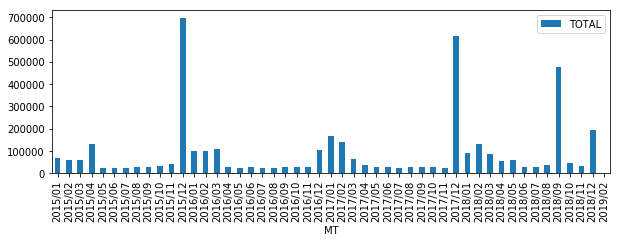

In [108]:
group_amount("ST SN PLOW ID CHRG FS").plot.bar(x = "MT", figsize = (10, 3))

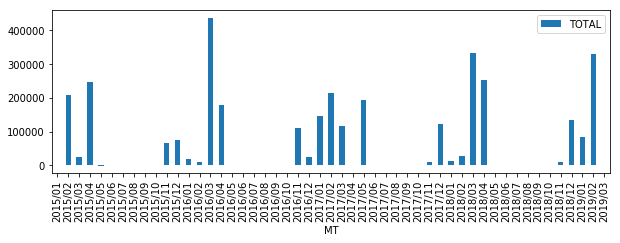

In [109]:
import copy
df = group_amount("ST SN PLOW SNOW SUP")
data = list(df.T.to_dict().values())
months_copy = copy.copy(months)
for entry in data:
    if entry['MT'] in months_copy:
        months_copy.remove(entry['MT'])
for month in months_copy:
    data.append({'MT': month, 'TOTAL': 0})
data.sort(key = lambda item: item['MT'])
df = pd.DataFrame(data)
df.plot.bar(x = "MT", figsize = (10, 3))

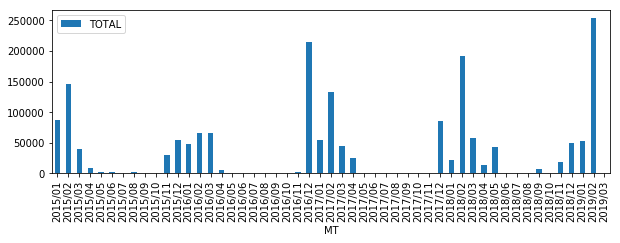

In [125]:
df = group_amount("ST SN PLOW OVRTM PERM")
data = list(df.T.to_dict().values())
months_copy = copy.copy(months)
for entry in data:
    if entry['MT'] in months_copy:
        months_copy.remove(entry['MT'])
for month in months_copy:
    data.append({'MT': month, 'TOTAL': 0})
data.sort(key = lambda item: item['MT'])
df = pd.DataFrame(data)
df.plot.bar(x = "MT", figsize = (10, 3))

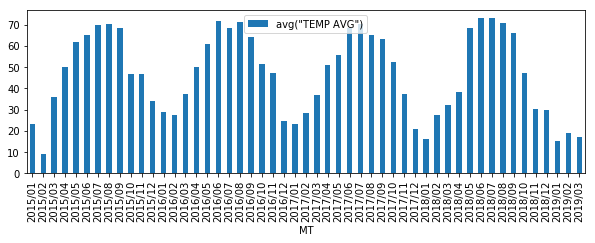

In [110]:
def group_weather(field, group = 'MT'):
    c = sqlite3.connect('weather.db')
    sql = '''
    select "''' + group + '''", avg("''' + field + '''") from weather
    group by "''' + group + '''"
    order by "''' + group + '''"
    '''
    df = pd.read_sql(sql, c)
    c.close()
    return df
group_weather('TEMP AVG').plot.bar(x = "MT", figsize = (10, 3))

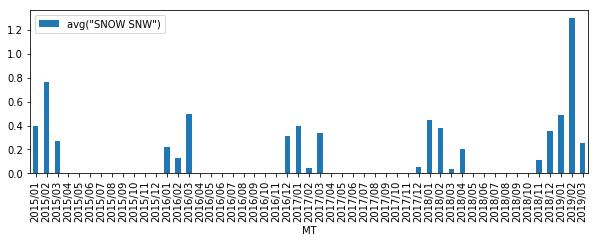

In [111]:
group_weather('SNOW SNW').plot.bar(x = "MT", figsize = (10, 3))

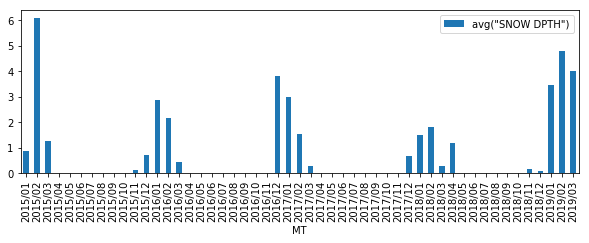

In [112]:
group_weather('SNOW DPTH').plot.bar(x = "MT", figsize = (10, 3))

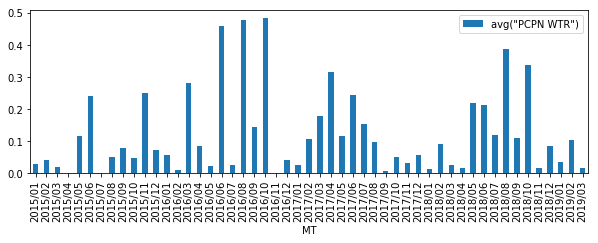

In [113]:
group_weather('PCPN WTR').plot.bar(x = "MT", figsize = (10, 3))

In [121]:
df = group_weather('SNOW SNW', group = 'DY')
df[df['avg("SNOW SNW")'] > 0.1]

,DY,"avg(""SNOW SNW"")"
1,2015/01/09,0.2
4,2015/01/21,0.6
6,2015/01/26,1.4
8,2015/01/31,1.3
9,2015/02/01,5.4
11,2015/02/03,2.5
17,2015/02/20,0.4
27,2015/03/23,3.0
101,2016/01/26,1.8
106,2016/02/03,1.0


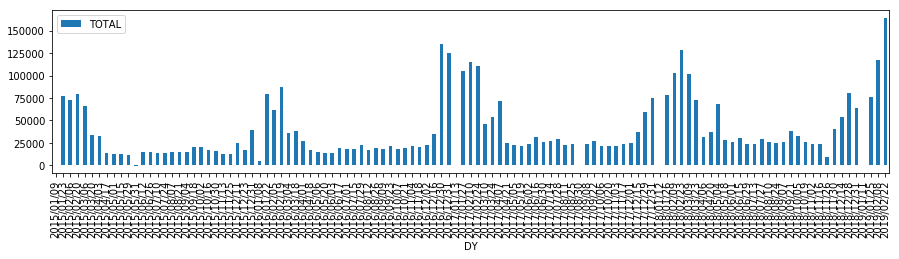

In [118]:
group_amount("ST SN PLOW PERM WAGES", 'DY').plot.bar(x = "DY", figsize = (15, 3))